In [20]:
%load_ext Cython
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from ipywidgets import interact

fig,axes=plt.subplots(5,5,figsize=(16,16))

# @interact(c=(0.,1),alpha=(1,3,0.5))
def show_glaph(c,alpha):
    #u(t,x)とする
    def culc_u(div_num_x):

        h = 1 / div_num_x
        dt=c*(h**alpha)
        div_num_t = int(0.5/dt)  # 時間tの分割数

        u = np.zeros((div_num_t + 1, div_num_x + 1)) #配列uの初期化　数値解が入る

        u[0] = [np.sin(np.pi * i * h) for i in range(div_num_x + 1)]

        for i in range(div_num_t):
            for j in range(1, div_num_x):
                u[i + 1, j] = 0.5 * (u[i, j - 1] + u[i, j + 1])

        return u


    def culc_u_unique_solution(div_num_x):

        h = 1 / div_num_x
        dt=c*(h**alpha)
        div_num_t = int(0.5/dt)

        t = np.linspace(0, 0.5, div_num_t + 1)
        x = np.linspace(0, 1, div_num_x + 1)
        X,T = np.meshgrid(x,t)

        u_unique_solution=np.exp(-T*(np.pi**2))*np.sin(np.pi*X)
        return u_unique_solution

    def culc_err(div_num_x):
        return np.max(np.abs(culc_u_unique_solution(div_num_x)-culc_u(div_num_x)))/np.max(np.abs(culc_u_unique_solution(div_num_x)))

    div_num_x_list=[8,16,32,64,128]
    err_list=[culc_err(i) for i in div_num_x_list]
    div_num_x_list=np.array(div_num_x_list)

    return (div_num_x_list,err_list)
    # plt.plot(div_num_x_list,err_list)

    # plt.xscale("log")
    # plt.yscale("log")
    # plt.xlabel("M")
    # plt.ylabel("err")
    # plt.show()

c=[0.2,0.4,0.5,0.6,0.8]
alpha=[1,1.5,2,2.5,3]

# for i in range(5):
#     for j in range(5):
#         x,e=show_glaph(c[i],alpha[j])
#         axes[i][j].plot(x,e)
for i in range(5):
    x,e=show_glaph(c[i],alpha[0])
    axes[0][i].plot(x,e)
    axes[0][i].set_xscale("log")
    axes[0][i].set_yscale("log")

for i in range(5):
    x,e=show_glaph(c[i],alpha[1])
    axes[1][i].plot(x,e)
    axes[1][i].set_xscale("log")
    axes[1][i].set_yscale("log")

for i in range(5):
    x,e=show_glaph(c[i],alpha[2])
    axes[2][i].plot(x,e)
    axes[2][i].set_xscale("log")
    axes[2][i].set_yscale("log")

for i in range(5):
    x,e=show_glaph(c[i],alpha[3])
    axes[3][i].plot(x,e)
    axes[3][i].set_xscale("log")
    axes[3][i].set_yscale("log")

for i in range(5):
    x,e=show_glaph(c[i],alpha[4])
    axes[4][i].plot(x,e)
    axes[4][i].set_xscale("log")
    axes[4][i].set_yscale("log")


plt.show()

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


KeyboardInterrupt: 

In [7]:
%load_ext Cython
import numpy as np
import matplotlib.pyplot as plt
from numba import njit


@njit("Tuple((f8[:,:],f8[:,:]))(f8[:],f8[:])",cache=True)
def meshgrid(x, y):
    xx = np.empty((y.size, x.size), dtype=np.float64)
    yy = np.empty((y.size, x.size), dtype=np.float64)
    for i in range(y.size):
        for j in range(x.size):
            xx[i, j] = x[j]
            yy[i, j] = y[i]
    return xx, yy

@njit(cache=True)
def culc_u(div_num_x,c,alpha):

    h = 1 / div_num_x
    dt=c*(h**alpha)
    div_num_t = int(0.5/dt)  # 時間tの分割数

    u = np.zeros((div_num_t + 1, div_num_x + 1)) #配列uの初期化　数値解が入る

    u[0] = [np.sin(np.pi * i * h) for i in range(div_num_x + 1)]

    for i in range(div_num_t):
        for j in range(1, div_num_x):
            u[i + 1, j] = 0.5 * (u[i, j - 1] + u[i, j + 1])

    return u

@njit(cache=True)
def culc_u_unique_solution(div_num_x,c,alpha):

    h = 1 / div_num_x
    dt=c*(h**alpha)
    div_num_t = int(0.5/dt)

    t = np.linspace(0, 0.5, div_num_t + 1)
    x = np.linspace(0, 1, div_num_x + 1)
    X,T = meshgrid(x,t)

    u_unique_solution=np.exp(-T*(np.pi**2))*np.sin(np.pi*X)
    return u_unique_solution

@njit(cache=True)
def culc_err(div_num_x,c,alpha):
    return np.max(np.abs(culc_u_unique_solution(div_num_x,c,alpha)-culc_u(div_num_x,c,alpha)))/np.max(np.abs(culc_u_unique_solution(div_num_x,c,alpha)))


@njit(cache=True)
def show_glaph(c,alpha):
    #u(t,x)とする






    div_num_x_list=[8,16,32,64,128]
    err_list=[culc_err(i,c,alpha) for i in div_num_x_list]
    div_num_x_list=np.array(div_num_x_list)

    return (div_num_x_list,err_list)
    # plt.plot(div_num_x_list,err_list)

    # plt.xscale("log")
    # plt.yscale("log")
    # plt.xlabel("M")
    # plt.ylabel("err")
    # plt.show()


The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


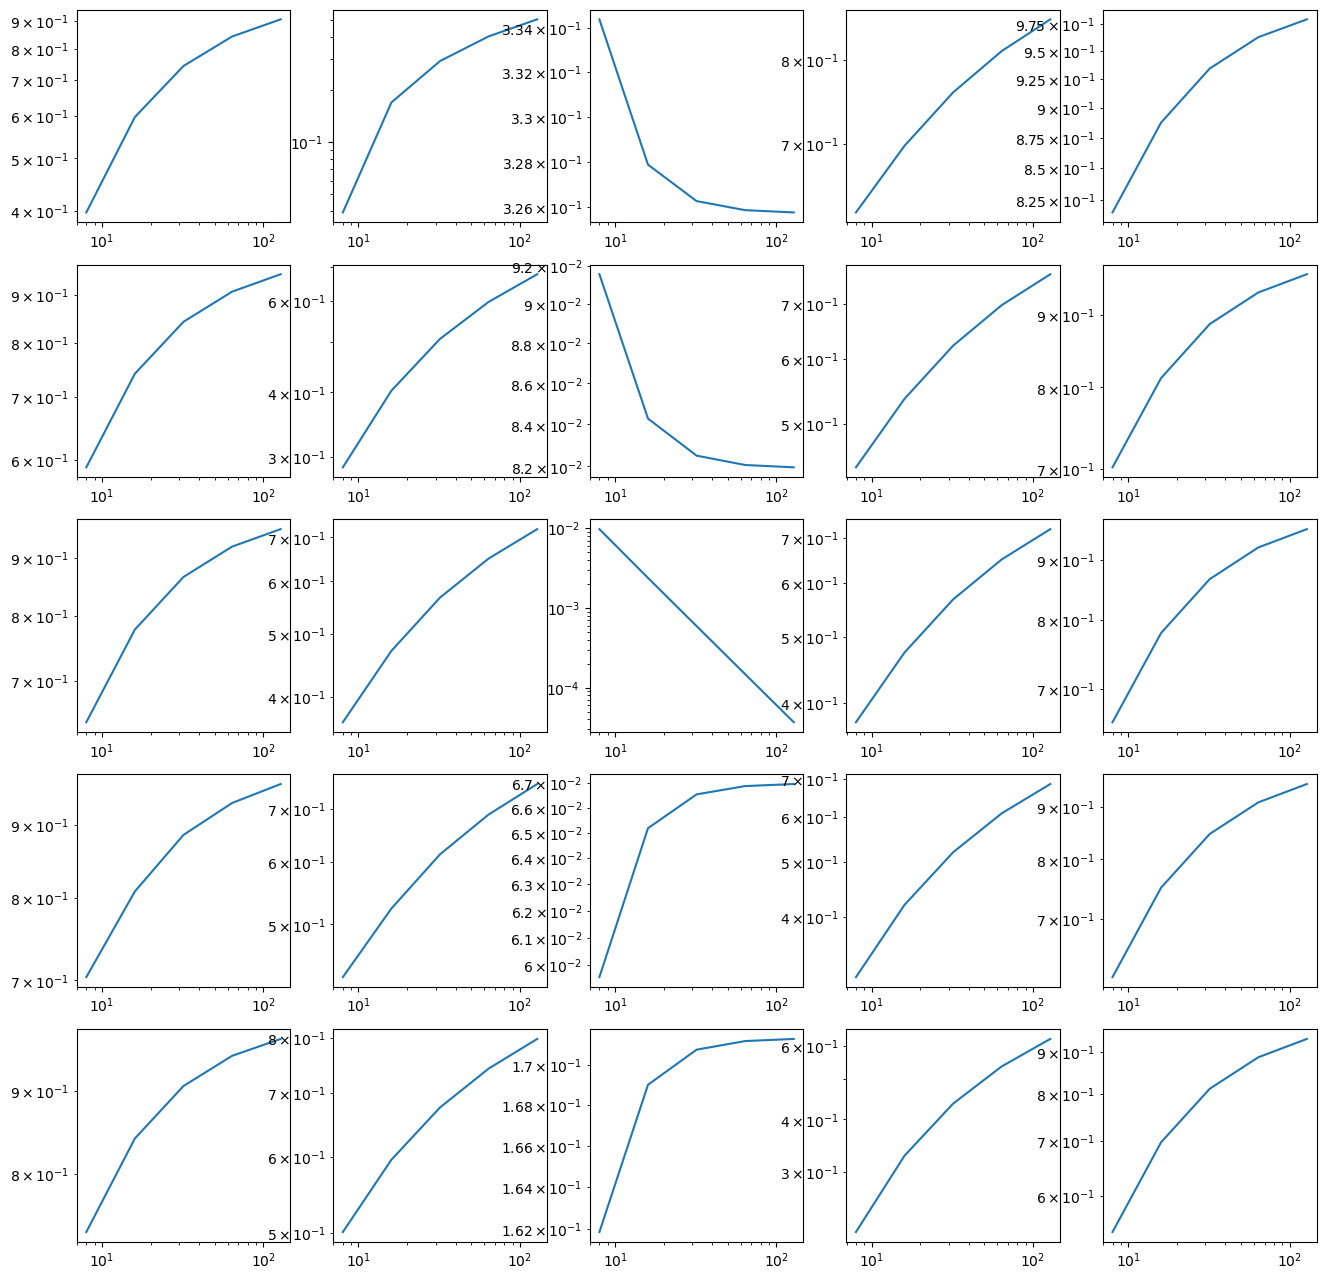

In [8]:
c=[0.2,0.4,0.5,0.6,0.8]
alpha=[1,1.5,2,2.5,3]

fig,axes=plt.subplots(5,5,figsize=(16,16))

for i in range(5):
    for j in range(5):
        x,e=show_glaph(c[i],alpha[j])
        axes[i][j].plot(x,e)
        axes[i][j].set_xscale("log")
        axes[i][j].set_yscale("log")


# for i in range(5):
#     x,e=show_glaph(c[i],alpha[0])
#     axes[0][i].plot(x,e)
#     axes[0][i].set_xscale("log")
#     axes[0][i].set_yscale("log")

# for i in range(5):
#     x,e=show_glaph(c[i],alpha[1])
#     axes[1][i].plot(x,e)
#     axes[1][i].set_xscale("log")
#     axes[1][i].set_yscale("log")

# for i in range(5):
#     x,e=show_glaph(c[i],alpha[2])
#     axes[2][i].plot(x,e)
#     axes[2][i].set_xscale("log")
#     axes[2][i].set_yscale("log")

# for i in range(5):
#     x,e=show_glaph(c[i],alpha[3])
#     axes[3][i].plot(x,e)
#     axes[3][i].set_xscale("log")
#     axes[3][i].set_yscale("log")

# for i in range(5):
#     x,e=show_glaph(c[i],alpha[4])
#     axes[4][i].plot(x,e)
#     axes[4][i].set_xscale("log")
#     axes[4][i].set_yscale("log")


plt.show()